In [1]:
#import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
dpi=150

import numpy as np
import oxyba as ox
from importlib import reload; reload(ox);

### Example 1

In the first example three continous ratio scaled uniform distributed random variables are generated.
As expected all Kendall tau rank correlations are zero. 
The `corr_tau` function will print a warning message because it detected that one or more variables are most likely not ordinal scale variables.

/Users/uh/Github/oxyba/oxyba/corr_tau.py:42: UserWarning: number of observations equals the number of unique values.
  warnings.warn(msg)


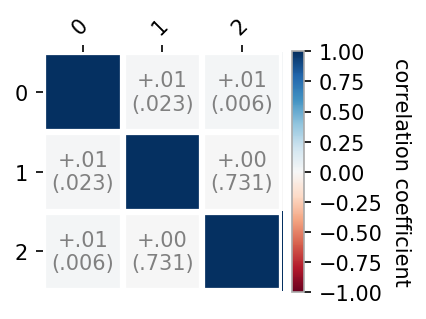

In [2]:
x = np.random.uniform(0,3, (10000,3))
tau, pval = ox.corr_tau(x)
ox.heatmap_corr(tau, pval, dpi=dpi);

### Example 2

The second example will use random integers as data. 
The function `corr_tau` will assume that such kind or sortable discrete data is ordinal or resp. an encoding of ordinal labels, i.e. no waring message.
Still no rank correlation as expected.

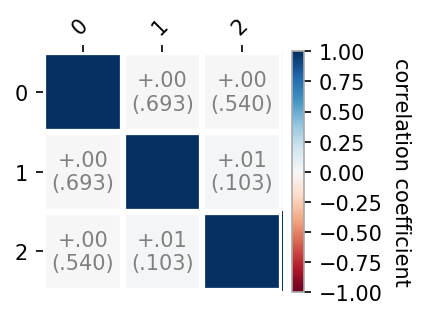

In [3]:
x = np.random.randint(0,3, (10000,3))
tau, pval = ox.corr_tau(x)
ox.heatmap_corr(tau, pval, dpi=dpi);

### Example 3

The third example will use the Boston demo dataset.

In [4]:
from sklearn.datasets import load_boston
tmp = load_boston()

First, find ordinal data. 
However, be aware that `ox.isordinal` would als return `True` for nominal scale labels or encoded nominal data.

In [5]:
idx = list();
for j in range(tmp.data.shape[1]):
    flag, msg = ox.isordinal(tmp.data[:,j])
    print(j, msg)
    if flag: idx.append(j)

0 elements are not integer or strings.
1 elements are not integer or strings.
2 elements are not integer or strings.
3 is ordinal
4 elements are not integer or strings.
5 elements are not integer or strings.
6 elements are not integer or strings.
7 elements are not integer or strings.
8 is ordinal
9 is ordinal
10 elements are not integer or strings.
11 elements are not integer or strings.
12 elements are not integer or strings.


Second, pick only the potentially ordinal scaled data (or nominal data)

In [6]:
idx = np.array(idx)
names = tmp.feature_names[idx]
x = tmp.data[:,idx]

Third, let's compute Kendall's tau rank correlations.

Det(tau) =  0.6857126429788132


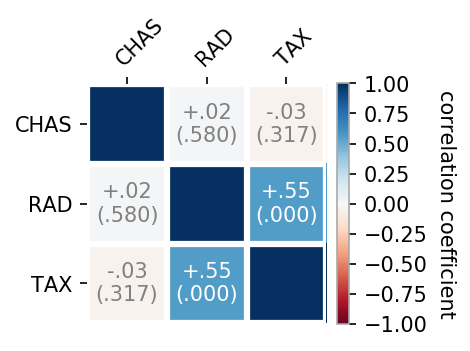

In [7]:
tau, pval = ox.corr_tau(x)
print("Det(tau) = ", np.linalg.det(tau))
ox.heatmap_corr(tau, pval, names, dpi=dpi);

Finally, we take a closer look at the `RAD` vs `TAX` relations

In [8]:
def ordinal_encode(x):
    import numpy as np
    labels = np.unique(x);
    codes = np.arange(len(labels))
    ranks = dict(zip(labels, codes))
    encoded = [ranks[k] for k in x]
    return np.array(encoded), ranks

In [9]:
ord1, ranks1 = ordinal_encode(x[:,1])
ord2, ranks2 = ordinal_encode(x[:,2])

Text(0,0.5,'encoded ranks 2')

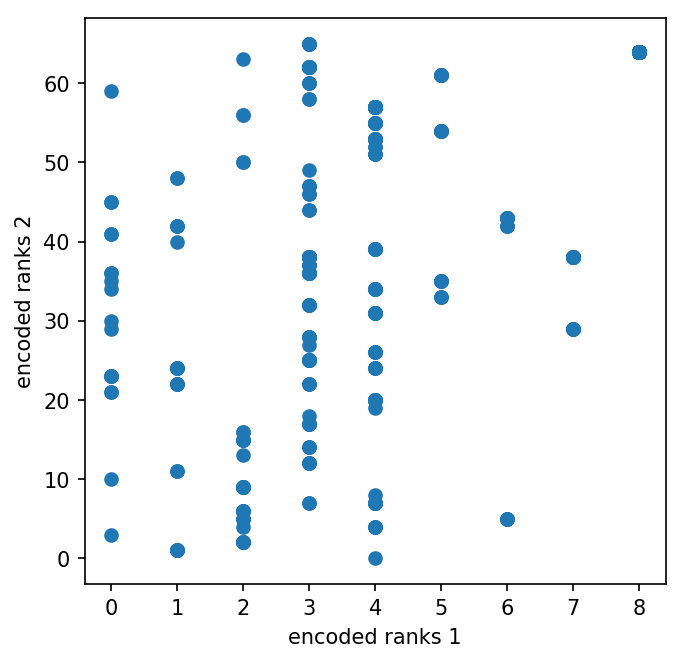

In [10]:
fig,ax = plt.subplots(figsize=(5,5), dpi=dpi)
ax.scatter(ord1, ord2);
ax.set_xlabel('encoded ranks 1')
ax.set_ylabel('encoded ranks 2')